In [1]:
#!pip install pynter-defects

In [1]:
from pynter.defects.analysis import DefectsAnalysis
from pynter.tools.utils import get_content_from_url
from pynter.phase_diagram.chempots import Reservoirs
from pymatgen.electronic_structure.dos import FermiDos
from pynter.tools.utils import get_object_from_json
from pynter.phase_diagram.thermodynamics import OxygenPressure
from pynter.defects.thermodynamics import PressureAnalysis
from pymatgen.core.composition import Composition
from pynter.defects.plotter import PressurePlotter

In [2]:
data_url = 'https://raw.githubusercontent.com/lorenzo-villa-hub/pynter-tutorials/master/notebooks/defects/data/'
da = DefectsAnalysis.from_json(get_content_from_url(data_url+'defects_analysis.json'))
res = Reservoirs.from_json(get_content_from_url(data_url+'reservoirs.json'))
dos = get_object_from_json(FermiDos, get_content_from_url(data_url+'dos.json'))

In [3]:
da_vac = da.filter_entries(exclude=True,mode='or',types=['DefectComplex'],elements=['Ca','Sr','Sn','Nb'])
da_vac.get_dataframe()

,symbol,delta atoms,charge,multiplicity
name,,,,
Vac_Na,$V_{Na}$,{'Na': -1},-1.0,32
Vac_Na,$V_{Na}$,{'Na': -1},0.0,32
Vac_Na,$V_{Na}$,{'Na': -1},1.0,32
Vac_O,$V_{O}$,{'O': -1},-2.0,96
Vac_O,$V_{O}$,{'O': -1},-1.0,96
Vac_O,$V_{O}$,{'O': -1},0.0,96
Vac_O,$V_{O}$,{'O': -1},1.0,96
Vac_O,$V_{O}$,{'O': -1},2.0,96


In [5]:
pressure_reservoirs = OxygenPressure().get_pressure_reservoirs_from_pd(phase_diagram=res.pd,target_comp=Composition('NaNbO3'),pressure_range=(-25,10),
                                                                       temperature=1000,npoints=20)
pressure_reservoirs.get_dataframe(ndecimals=2)

,Na,Nb,O
1.000000e-25,-2.75,-12.14,-8.51
6.952000e-24,-2.84,-12.60,-8.33
4.833000e-22,-2.93,-13.06,-8.15
3.360000e-20,-3.02,-13.51,-7.96
2.336000e-18,-3.11,-13.97,-7.78
1.624000e-16,-3.20,-14.43,-7.60
1.129000e-14,-3.29,-14.89,-7.41
7.848000e-13,-3.39,-15.34,-7.23
5.456000e-11,-3.48,-15.80,-7.05
3.793000e-09,-3.57,-16.26,-6.87


In [6]:
pa = PressureAnalysis(defects_analysis=da_vac,bulk_dos=dos)

In [7]:
thermodata = pa.get_concentrations(reservoirs=pressure_reservoirs,temperature=1000)

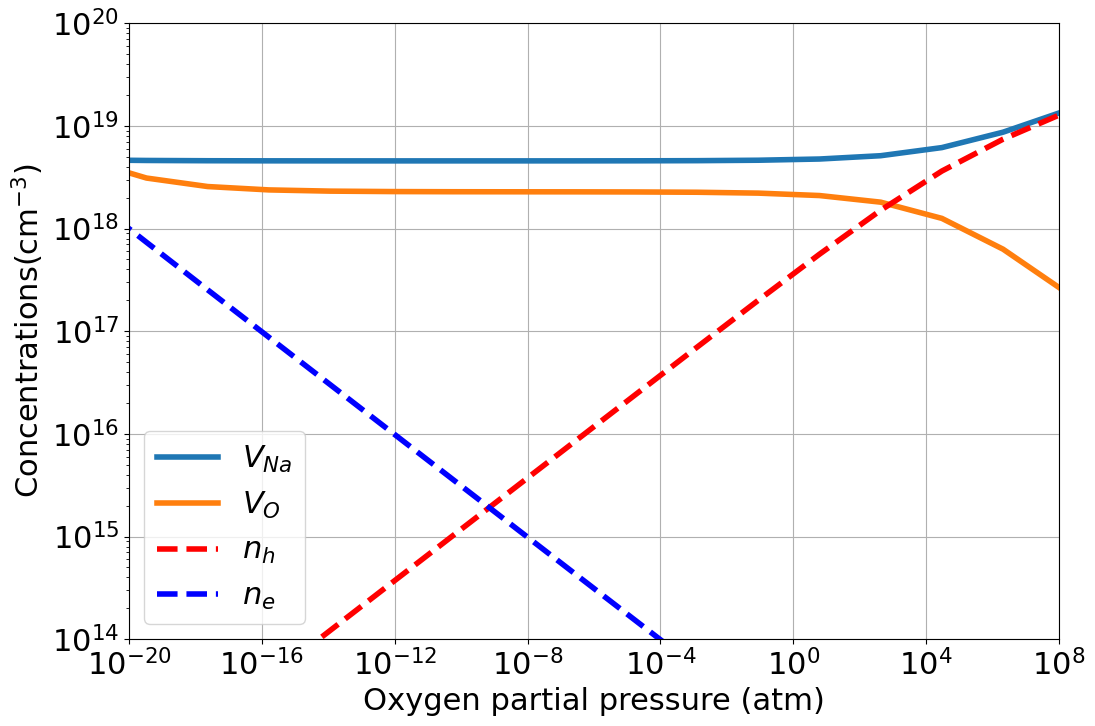

In [8]:
plotter = PressurePlotter()
plotter.plot_concentrations(thermodata=thermodata,ylim=(1e14,1e20));